In [1]:
import importlib
from get_price import *
import cal_indicators
importlib.reload(cal_indicators)
from cal_indicators import *

import plots
importlib.reload(plots)
from plots import *


Price data saved to ./price_data.csv


In [2]:
%run get_price.py

Price data saved to ./price_data.csv


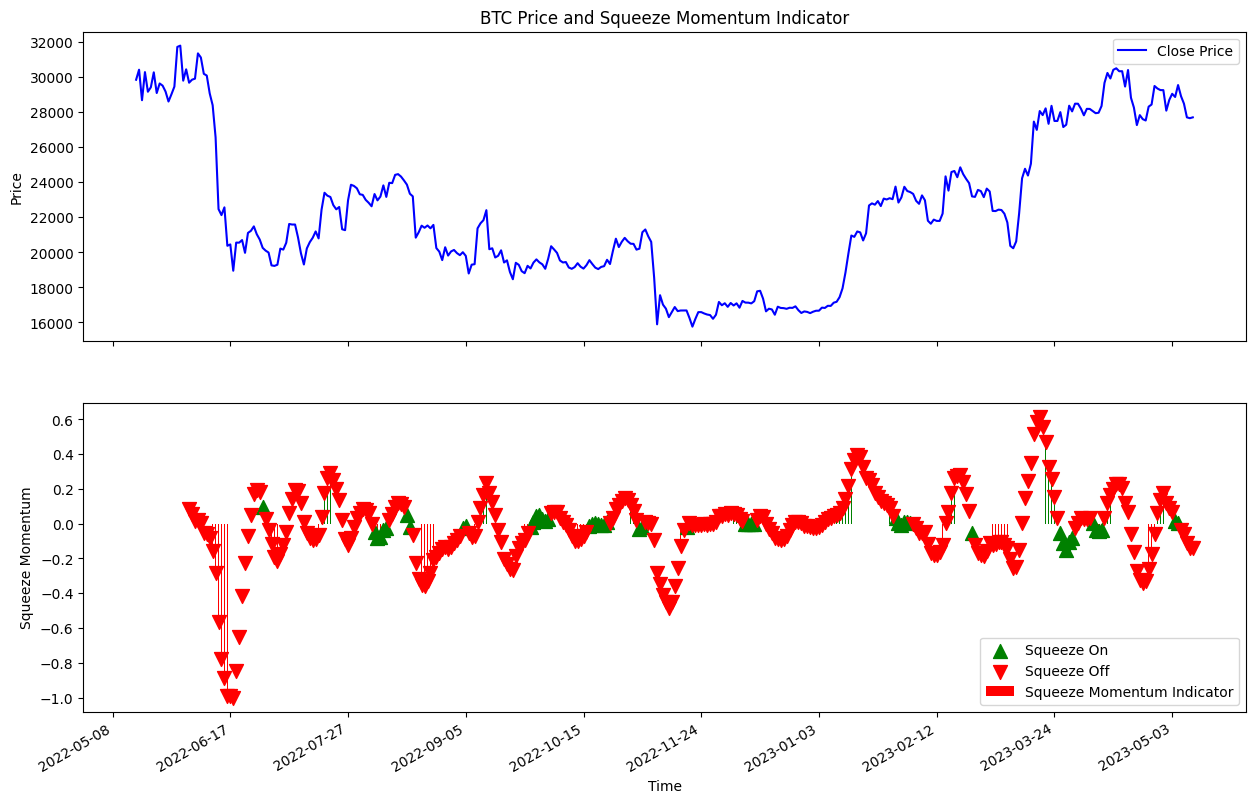

In [5]:
price_data = squeeze_momentum_indicator(price_data_df, length_bb=10, length_kc=10)
plot_squeeze_momentum(price_data)

price_data = generate_smi_signals(price_data, min_smi_threshold=0.1)
price_data_with_signals = price_data[price_data['signal'].isin(['buy', 'sell'])]


In [24]:
price_data = calculate_ema(price_data_df,'close',10)
price_data = calculate_ema(price_data,'close',20)
price_data = generate_signals(price_data, 'EMA10','EMA20')

price_data_with_signals = price_data[price_data['signal'].isin(['buy', 'sell'])]


In [6]:
price_data_with_signals

,time,open,high,low,close,volume,squeeze_momentum,squeeze_on,squeeze_off,signal


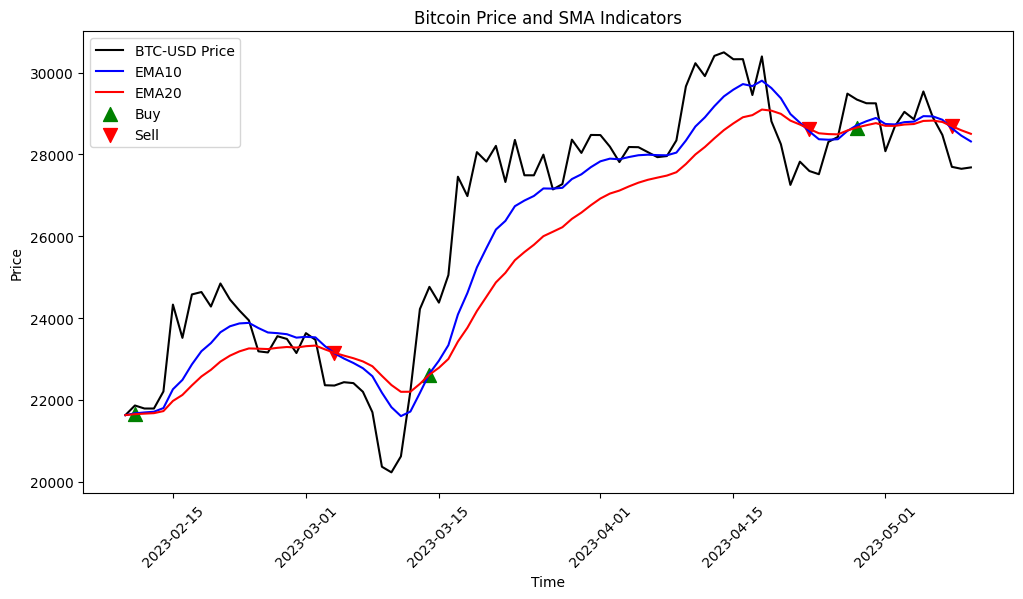

In [26]:
plot_combined(price_data, 'EMA10', 'EMA20')

2023-02-11 00:00:00: BUY  at 21863.73, Total profit:       0.00, Profit percentage:   0.00%
2023-03-04 00:00:00: SELL at 22350.95, Total profit:     222.84, Profit percentage:   2.23%
2023-03-14 00:00:00: BUY  at 24762.65, Total profit:     222.84, Profit percentage:   2.23%
2023-04-23 00:00:00: SELL at 27592.98, Total profit:    1391.30, Profit percentage:  13.91%
2023-04-28 00:00:00: BUY  at 29338.63, Total profit:    1391.30, Profit percentage:  13.91%
2023-05-08 00:00:00: SELL at 27695.06, Total profit:     753.15, Profit percentage:   7.53%


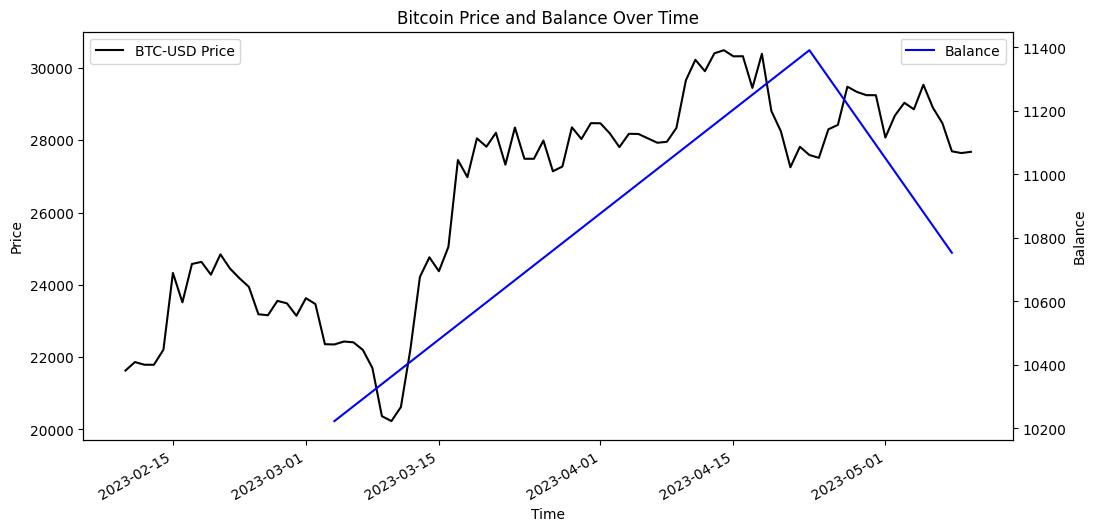

In [29]:
# Backtesting the strategy
start_day = '2023-02-1'
end_day = '2023-05-10'

price_data_filtered = price_data[(price_data['time'] >= start_day) & (price_data['time'] <= end_day)]


balance = backtest_sma_strategy(price_data, short_term_MA='EMA10', long_term_MA='EMA20')
plot_balance_and_price(price_data_filtered, balance)

In [9]:
balance

,time,balance
0,2022-05-18,9428.129312
1,2022-06-11,8440.229880
2,2022-08-19,7516.616035
3,2022-09-13,6769.095116
4,2022-10-08,6583.896034
5,2022-11-09,5209.078655
6,2022-12-18,5104.181876
7,2023-02-13,6494.281139
8,2023-03-03,5968.188908
9,2023-04-23,6755.508729


In [7]:
price_data_filtered

,time,open,high,low,close,volume,EMA10,EMA20,signal
0,2022-05-16,29055.00,31293.31,31290.02,29839.89,22646.185074,29839.890000,29839.890000,hold
1,2022-05-17,29415.01,30750.00,29839.89,30412.12,19833.306767,29943.931818,29894.388095,buy
2,2022-05-18,28605.00,30675.92,30412.10,28672.94,28348.426436,29712.842397,29778.059705,sell
3,2022-05-19,28645.20,30500.00,28671.50,30274.59,29009.971058,29814.978325,29825.348305,hold
4,2022-05-20,28690.92,30729.83,30274.59,29155.75,34328.187919,29695.118629,29761.577038,hold
...,...,...,...,...,...,...,...,...,...
355,2023-05-06,28394.00,29850.00,29538.87,28902.66,8546.798749,28928.152718,28825.310048,hold
356,2023-05-07,28429.12,29189.71,28901.30,28474.53,5884.670074,28845.675860,28791.902424,hold
357,2023-05-08,27279.66,28676.38,28472.68,27695.06,15859.418396,28636.472976,28687.441241,sell
358,2023-05-09,27367.01,27833.64,27693.24,27647.29,8888.426836,28456.621526,28588.379218,hold
